Load data from file. Show data information and few rows.

In [22]:
import pandas as pd

# Load data from file
data = pd.read_csv('uploads/honda_sell_data.csv')

# Show data information
print(data.info())

# Show first few rows of data
print(data.head()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   object 
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      3514 non-null   object 
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

Data Cleaning for 'Price' Column by Remove non-numeric characters, convert 'Not Priced' to 0 and convert to float.

In [24]:
sorted(data['Price'].unique())[-5:]

['$9,988', '$9,990', '$9,995', '$9,999', 'Not Priced']

In [2]:
# Define function to clean price column
def clean_price(price):
    # Remove non-numeric characters
    price = price.replace('$', '').replace(',', '')
    # Convert 'Not Priced' to 0
    if price == 'Not Priced':
        price = '0'
    # Convert to float
    price = float(price)
    return price

# Apply clean_price function to 'Price' column
data['Price'] = data['Price'].apply(clean_price)

# Show updated data information
print(data.info())

# Show updated first few rows of data
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4999 non-null   int64  
 1   Make                     4999 non-null   object 
 2   Model                    4999 non-null   object 
 3   Condition                4999 non-null   object 
 4   Price                    4999 non-null   float64
 5   Consumer_Rating          4999 non-null   float64
 6   Consumer_Review_#        4999 non-null   int64  
 7   Exterior_Color           4988 non-null   object 
 8   Interior_Color           4988 non-null   object 
 9   Drivetrain               4988 non-null   object 
 10  MPG                      3514 non-null   object 
 11  Fuel_Type                4988 non-null   object 
 12  Transmission             4988 non-null   object 
 13  Engine                   4988 non-null   object 
 14  VIN                     

Data Cleaning for 'Mileage' Column by convert not numeric characters to NaN and remove missing values.

In [10]:
# Define function to clean mileage column
def clean_mileage(mileage):
    # Convert non-numeric characters to NaN
    if not mileage.isnumeric():
        mileage = float('NaN')
    else:
        mileage = int(mileage)
    return mileage

# Apply clean_mileage function to 'Mileage' column
data['Mileage'] = data['Mileage'].apply(clean_mileage)

# Remove missing values
data.dropna(subset=['Mileage'], inplace=True)

# Show final data information
print(data.info())

# Show final first few rows of data
print(data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4701 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4701 non-null   int64  
 1   Make                     4701 non-null   object 
 2   Model                    4701 non-null   object 
 3   Condition                4701 non-null   object 
 4   Price                    4701 non-null   float64
 5   Consumer_Rating          4701 non-null   float64
 6   Consumer_Review_#        4701 non-null   int64  
 7   Exterior_Color           4701 non-null   object 
 8   Interior_Color           4701 non-null   object 
 9   Drivetrain               4701 non-null   object 
 10  MPG                      3430 non-null   object 
 11  Fuel_Type                4701 non-null   object 
 12  Transmission             4701 non-null   object 
 13  Engine                   4701 non-null   object 
 14  VIN                     

Visualize the distribution of car prices using a histogram and boxplot to identify any outliers or skewness in the data.

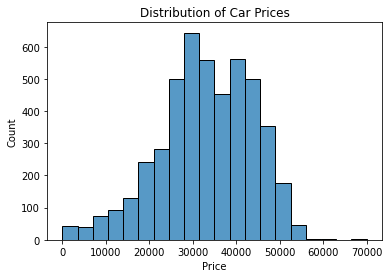

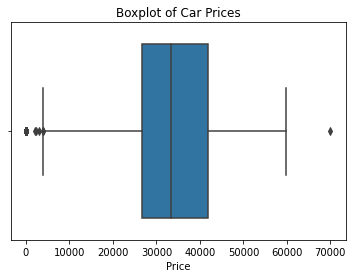

Number of outliers: 1
      Year   Make                         Model Condition    Price  \
3586  2021  Honda  Civic Type R Limited Edition      Used  69980.0   

      Consumer_Rating  Consumer_Review_#  Exterior_Color Interior_Color  \
3586              4.9                  0  Phoenix Yellow      Black/Red   

             Drivetrain  ... Stock_# Mileage Comfort_Rating  \
3586  Front-wheel Drive  ...  203958   700.0            5.0   

     Interior_Design_Rating Performance_Rating Value_For_Money_Rating  \
3586                    4.8                5.0                    4.8   

      Exterior_Styling_Rating  Reliability_Rating  State  Seller_Type  
3586                      4.8                 5.0     FL       Dealer  

[1 rows x 25 columns]


In [12]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create histogram of car prices
sns.histplot(data=data, x='Price', bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Create boxplot of car prices
sns.boxplot(data=data, x='Price')
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

# Identify outliers
outliers = data[data['Price'] > 60000]
print('Number of outliers:', len(outliers))
print(outliers)

Remove the outlier(s) from the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4700 non-null   int64  
 1   Make                     4700 non-null   object 
 2   Model                    4700 non-null   object 
 3   Condition                4700 non-null   object 
 4   Price                    4700 non-null   float64
 5   Consumer_Rating          4700 non-null   float64
 6   Consumer_Review_#        4700 non-null   int64  
 7   Exterior_Color           4700 non-null   object 
 8   Interior_Color           4700 non-null   object 
 9   Drivetrain               4700 non-null   object 
 10  MPG                      3429 non-null   object 
 11  Fuel_Type                4700 non-null   object 
 12  Transmission             4700 non-null   object 
 13  Engine                   4700 non-null   object 
 14  VIN                     

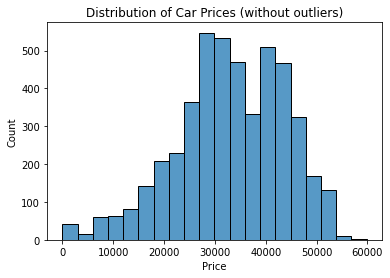

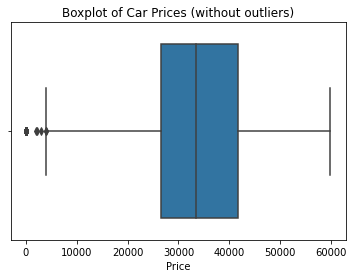

In [13]:
# Remove outliers
data = data[data['Price'] <= 60000]

# Show updated data information
print(data.info())

# Show updated first few rows of data
print(data.head())

# Create histogram of car prices without outliers
sns.histplot(data=data, x='Price', bins=20)
plt.title('Distribution of Car Prices (without outliers)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Create boxplot of car prices without outliers
sns.boxplot(data=data, x='Price')
plt.title('Boxplot of Car Prices (without outliers)')
plt.xlabel('Price')
plt.show()

Create new column 'Age' by subtracting the 'Year' column from the current year

In [17]:
# Create new column 'Age' by subtracting the 'Year' column from the current year
data['Age'] = pd.datetime.now().year - data['Year']

# Show updated data information
print(data.info())

# Show updated first few rows of data
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4998
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4700 non-null   int64  
 1   Make                     4700 non-null   object 
 2   Model                    4700 non-null   object 
 3   Condition                4700 non-null   object 
 4   Price                    4700 non-null   float64
 5   Consumer_Rating          4700 non-null   float64
 6   Consumer_Review_#        4700 non-null   int64  
 7   Exterior_Color           4700 non-null   object 
 8   Interior_Color           4700 non-null   object 
 9   Drivetrain               4700 non-null   object 
 10  MPG                      3429 non-null   object 
 11  Fuel_Type                4700 non-null   object 
 12  Transmission             4700 non-null   object 
 13  Engine                   4700 non-null   object 
 14  VIN                     

/tmp/ipykernel_8323/324140383.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['Age'] = pd.datetime.now().year - data['Year']


Feature Scaling by Standardization for Year, Consumer_Rating, Consumer_Review_#, Mileage, Comfort_Rating, Interior_Design_Rating, Performance_Rating, Value_For_Money_Rating, Exterior_Styling_Rating, Reliability_Rating, Age. 

In [19]:
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Define columns to be scaled
cols_to_scale = ['Year', 'Consumer_Rating', 'Consumer_Review_#', 'Mileage', 'Comfort_Rating', 'Interior_Design_Rating', 'Performance_Rating', 'Value_For_Money_Rating', 'Exterior_Styling_Rating', 'Reliability_Rating', 'Age']

# Create StandardScaler object
scaler = StandardScaler()

# Fit scaler to data
scaler.fit(data[cols_to_scale])

# Transform data using scaler
data[cols_to_scale] = scaler.transform(data[cols_to_scale])

# Show updated data information
print(data.info())

# Show updated first few rows of data
print(data.head()) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4998
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     4700 non-null   float64
 1   Make                     4700 non-null   object 
 2   Model                    4700 non-null   object 
 3   Condition                4700 non-null   object 
 4   Price                    4700 non-null   float64
 5   Consumer_Rating          4700 non-null   float64
 6   Consumer_Review_#        4700 non-null   float64
 7   Exterior_Color           4700 non-null   object 
 8   Interior_Color           4700 non-null   object 
 9   Drivetrain               4700 non-null   object 
 10  MPG                      3429 non-null   object 
 11  Fuel_Type                4700 non-null   object 
 12  Transmission             4700 non-null   object 
 13  Engine                   4700 non-null   object 
 14  VIN                     

Feature Scaling by one-hot encoder for object columns.

In [21]:
# Apply one-hot encoding to object columns
data = pd.get_dummies(data, columns=['Make', 'Model', 'Condition', 'Exterior_Color', 'Interior_Color', 'Drivetrain', 'MPG', 'Fuel_Type', 'Transmission', 'Engine', 'State', 'Seller_Type'])

# Show updated data information
print(data.info())

# Show updated first few rows of data
print(data.head()) 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4700 entries, 0 to 4998
Columns: 704 entries, Year to Seller_Type_Dealer
dtypes: float64(12), object(2), uint8(690)
memory usage: 3.6+ MB
None
       Year    Price  Consumer_Rating  Consumer_Review_#                VIN  \
0  0.694731  46370.0         0.439441          -0.644077  5FPYK3F58PB011817   
2  0.694731  34245.0         0.244502           0.798461  2HKRS5H55PH704805   
3  0.428897  46500.0         0.829317          -0.642564  5FNYF6H82NB100429   
4  0.694731  40395.0        -0.340312          -0.642564  2HKRS6H90PH805954   
5  0.694731  42250.0        -0.340312          -0.642564  5FNRL6H67PB024270   

    Stock_#   Mileage  Comfort_Rating  Interior_Design_Rating  \
0  00830164 -0.654554        0.725532                0.195881   
2  PH704805 -0.654793        0.725532               -3.700500   
3  5700429B -0.654687        0.725532                0.628813   
4   5705954 -0.654687        0.725532               -3.700500   
5   572